<font size=4.5><font color="darkblue">
Graham Smith
<br>
Student ID: 912355584
<br><br>
Worked with: Chad Pickering, Edie Espejo, Patrick Vaceck, Nivi Achanta, Colin Santos, Ricky Saverin
</font></font>

# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [8]:
#LOAD NECESSARY PACKAGES
from fastcache import clru_cache
import requests_cache as rc
import requests as requests
from bs4 import BeautifulSoup
import lxml.html as ix
from urllib2 import Request, urlopen
import re
import pandas as pd
import time
import numpy as np

In [2]:
url = 'https://theaggie.org/sports/'

#FUNCTION TO EXTRACT LINKS FROM ONE PAGE
@clru_cache(maxsize=128,typed=False)
def getLinks(url):
    
    a = requests.get(url)
    r = a.text
    soup = BeautifulSoup(r, 'html.parser')
    links = [u.findNext().get('href') for u in soup.findAll('h2')]

    return(links)

In [3]:
#FUNCTION TO GENERALIZE LINK EXTRACTION TO MULTIPLE PAGES
@clru_cache(maxsize=128,typed=False)
def linkExtract(url, page=None):
    
    #SETS THE DEFAULT NUM_PAGES TO 1
    if page is None:
        page=1
    
    #SETS INDEXING FOR WHEN PAGE NUMBER IS 0
    num_pages = range(1, page + 1)
    
    #CREATE SEARCH QUERY FOR EACH PAGE TO BE SEARCHED
    query = [(url + 'page/' + str(x) + '/') for x in num_pages]
    
    #GET THE LINKS FOR EVERY PAGE
    links = [getLinks(x) for x in query]
    
    return(links)

In [12]:
#TEST THE FUNCTION
linkExtract(url,2)

[[u'https://theaggie.org/2017/02/23/the-amazeing-aggies/',
  u'https://theaggie.org/2017/02/23/uc-davis-womens-water-polo-dominates-aggie-shootout/',
  u'https://theaggie.org/2017/02/23/womens-gymnastics-take-two/',
  u'https://theaggie.org/2017/02/21/what-are-your-thoughts-on-uc-davis-athletics/',
  u'https://theaggie.org/2017/02/20/a-day-in-the-life-of-an-athletic-trainer/',
  u'https://theaggie.org/2017/02/19/a-lifetime-of-tennis/',
  u'https://theaggie.org/2017/02/17/uc-davis-womens-basketball-team-holds-off-uc-irvine-62-42/',
  u'https://theaggie.org/2017/02/17/nba-awards-at-the-all-star-break/',
  u'https://theaggie.org/2017/02/17/womens-lacrosse-soars-over-the-blackbirds/',
  u'https://theaggie.org/2017/02/17/uc-davis-womens-lacrosse-falls-in-tough-season-opener/',
  u'https://theaggie.org/2017/02/16/uc-davis-softball-falls-in-home-opener/',
  u'https://theaggie.org/2017/02/16/ags-compensate-for-recent-loss-to-highlanders-with-decisive-win/',
  u'https://theaggie.org/2017/02/13/

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [4]:
url = 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'

@clru_cache(maxsize=128,typed=False)
def infoGet(url):
    
    #OPEN THE URL SO IT CAN BE READ
    url_opened = urlopen(url)
    
    #PARSE IT
    soup = BeautifulSoup(url_opened, 'html.parser')
    
    #ALL THE INFO WE WANT IS IN '<div itemprop=articleBody>' SO WE PULL IT OUT AND MAKE IT A STRING
    article = str([j.text for j in soup.findAll("div") if j.get("itemprop") == "articleBody"])
    
    #THERE ARE SEVERAL PLACES TO PULL THE ARTICLE TITLE, BUT WE'RE GETTING IT FROM '<h1 class=entry-title>'
    title = soup.find_all('h1', {'class':'entry-title'})[0].text
    
    #AUTHOR CAN BE FOUND AT THE END OF THE PARAGRAPH, FOLLOWED ONLY BY URL SO WITH TWO SPLITS WE CAN PULL IT OUT, MAKING
    #SURE TO IGNORE THE ASCII CHARACTERS. SET ANY PROBLEM FIELDS TO NaN
    try:
        author = re.split('Written [Bb]y:*', article, re.IGNORECASE)[1].encode('ascii', 'ignore')
        author = re.split('\\\\', author, re.IGNORECASE)[0].encode('ascii', 'ignore')
    except:
        author = np.NaN
     
    #TEXT OF THE ARTICLE IS ALL IN <p> TAGS WITH 'font-weight: 400' SO ITS EASY TO PULL OUT
    paragraphs = [soup.find_all("span", { "style" : "font-weight: 400;" })[j].text 
                  for j in range(len(soup.find_all("span", { "style" : "font-weight: 400;" })))]
    
    #REMOVE THE ASCII CHARACTERS AND JOIN THE PARAGRAPHS TOGETHER
    text = "".join(paragraphs).encode('ascii', 'ignore')
    
    #COMBINE INTO A DICTIONARY
    dic = {'author': author, 'text': text, 'title': title, 'url': url}
    
    return(dic)

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [9]:
@clru_cache(maxsize=128,typed=False)
def infoDF(url):

    #RETURNS A LIST OF LISTS WHERE EACH MAIN ELEMENT IS A PAGE, AND EACH SUBELEMENT IS AN ARTICLE LINK WITHIN THAT PAGE
    all_links = linkExtract(url, 4)
    
    #BREAK all_lists APART AND MAKE IT INTO A SINGLE LIST, WITH EACH ELEMENT BEING AN ARTICLE LINK
    links = [item for sublist in all_links for item in sublist]
    
    #GET THE DICITONARY OF INFO FOR EACH ARTICLE
    campus_info = [infoGet(j) for j in links]
    
    return(campus_info)

<font size=4.5><font color="darkblue">
Run the above function on the 60 most recent city news and campus news articles, and make them into data frames.
</font></font>

In [10]:
url_1 = 'https://theaggie.org/city/'
info_1 = infoDF(url_1)
city_df = pd.DataFrame(info_1)
city_df['category'] = ['city News']*len(city_df)

url_2 = 'https://theaggie.org/campus/'
info_2 = infoDF(url_2)
campus_df = pd.DataFrame(info_2)
campus_df['category'] = ['campus news']*len(campus_df)

<font size=4.5><font color="darkblue">
Combine the above two data frames into a single data frame.
</font></font>

In [11]:
frames = [city_df, campus_df]
article_df = pd.concat(frames)

#CHANGE INDEX TO REMOVE DUPLICATES
article_df.index = (range(len(article_df)))
article_df

,author,text,title,url,category
0,Kaelyn Tuermer-Lee,After five years of providing business to stud...,Davis’ Whole Foods Market shuts down,https://theaggie.org/2017/02/23/davis-whole-fo...,city News
1,Anya Rehon,Over 100 protesters both for and against Plann...,Protest against Planned Parenthood in Woodland...,https://theaggie.org/2017/02/23/protest-agains...,city News
2,Bianca Antunez,The City of Davis must sell its Historic City ...,Davis’s Historic City Hall building to be put ...,https://theaggie.org/2017/02/23/daviss-histori...,city News
3,Caitlyn Sampley,"On his seventh day in office, when President T...",Davis stands with Muslim residents,https://theaggie.org/2017/02/21/davis-stands-w...,city News
4,Anya Rehon,The City of Davis will soon have new recycling...,City of Davis awarded funds for new recycling ...,https://theaggie.org/2017/02/20/city-of-davis-...,city News
5,Sam Solomon,Feb. 6Chronic phone problem.Feb. 7Person not m...,Police Logs,https://theaggie.org/2017/02/19/police-logs-12/,city News
6,Raul Castellanos Jr,President Donald Trump signed an executive ord...,City of Davis to retain sanctuary city status,https://theaggie.org/2017/02/16/city-of-davis-...,city News
7,Samantha Solomon,"Police arrested a Lauren Kirk-Coehlo, resident...",Suspect in Davis Islamic Center vandalism arre...,https://theaggie.org/2017/02/15/suspect-in-dav...,city News
8,Bianca Antunez,To increase transparency between the citys fin...,Project Toto aims to address questions regardi...,https://theaggie.org/2017/02/14/project-toto-a...,city News
9,Kaelyn Tuermer-Lee,Jan. 29Loud music or TV reporting party has g...,Police Logs,https://theaggie.org/2017/02/13/police-logs-11/,city News


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [12]:
# NATURAL LANGUAGE PROCESSING & REGEX
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import re

# COUNTER CLASS
from collections import Counter

# SCIKIT LEARN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor

# VISUALISATION
from matplotlib import pyplot as plt
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import random

<font size=4.5><font color="darkblue">
First step is go get some simple visualizations via wordcloud.
</font></font>

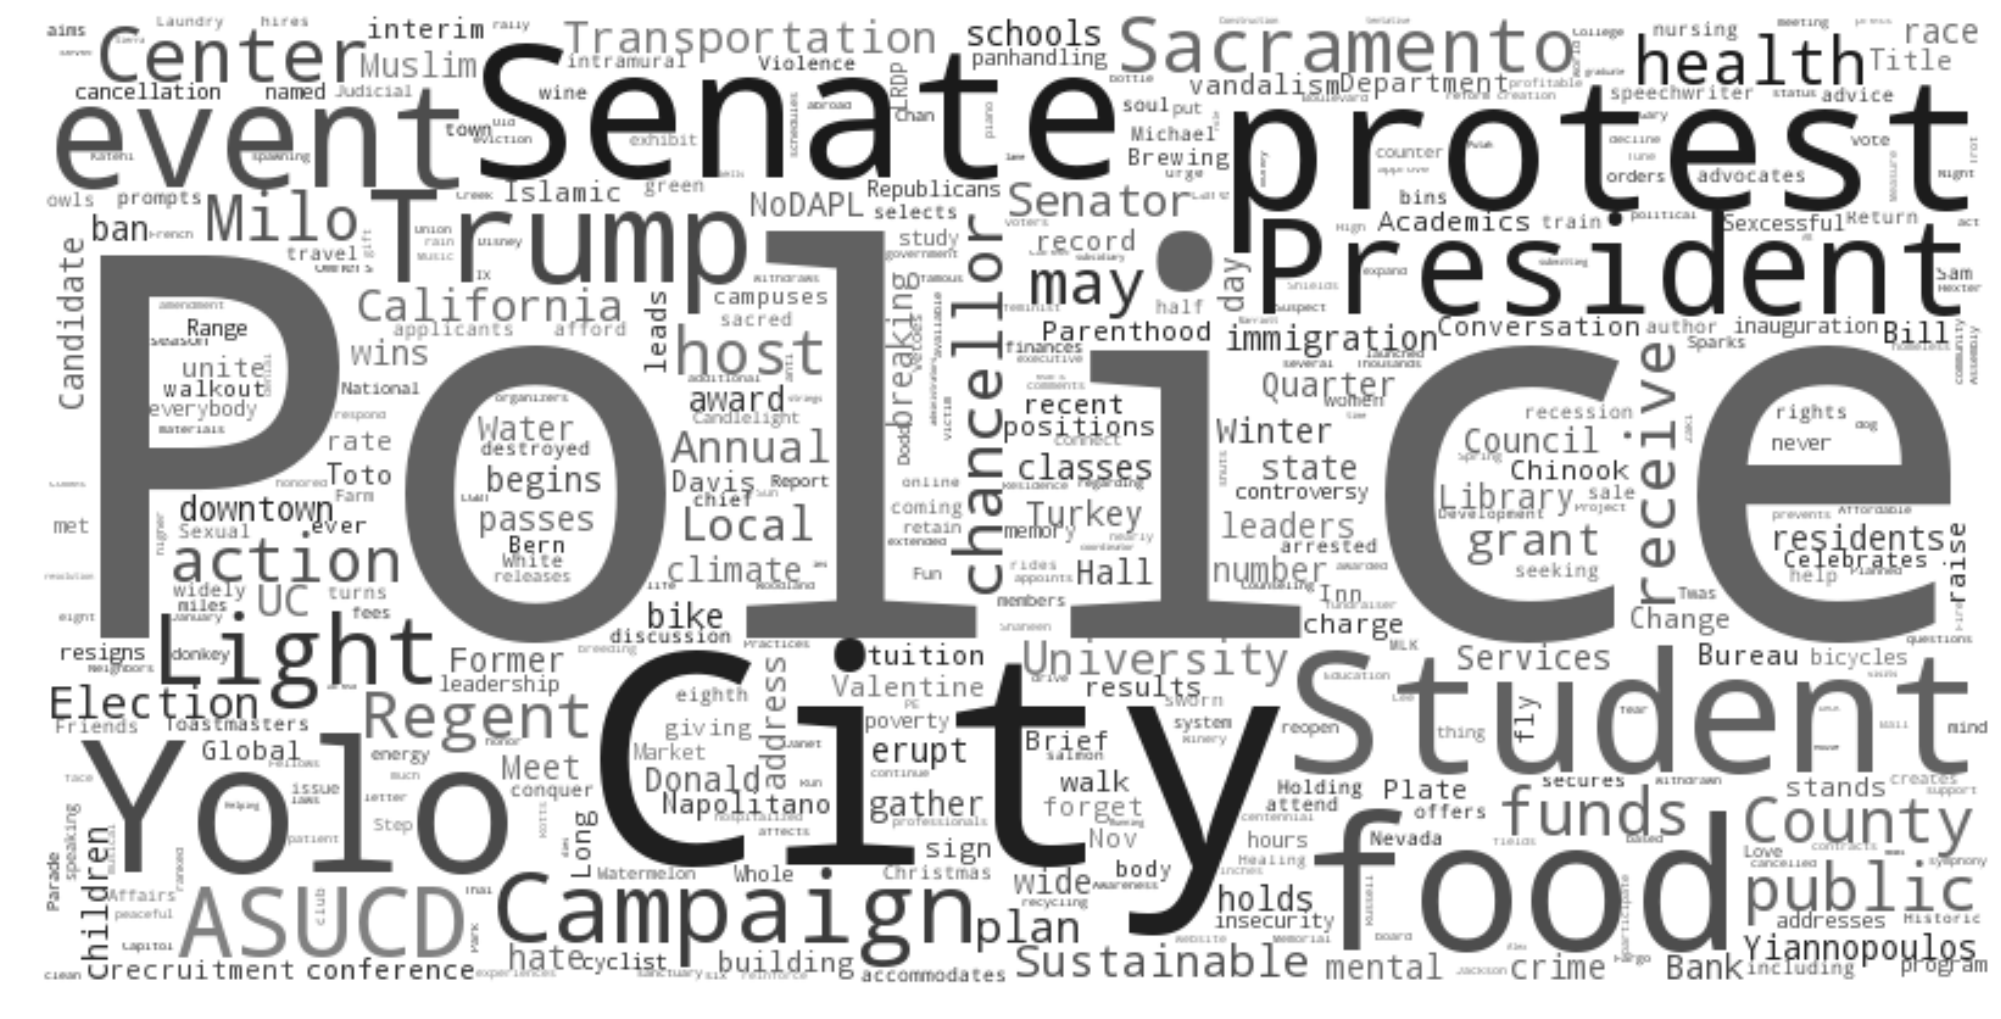

In [72]:
from wordcloud import WordCloud, STOPWORDS
import random

#LIST OF OTHER WORDS THAT DON'T MATTER.
my_stopwords = set(["UC","Davis","people","said", "will", "really", "going", "might", "also", "come", "don't", "in", "students",
                    "year", "Day", "new", "News", "Last", "week", "Logs", "first", 'help'"recieve", "million", 'one', 'think',
                    'years', 'make', 'well', 'want', 'need', 'around', 'able', '1', 'two','order', 'go', 'via', 'see', '000',
                    'important', 'many', 'now', 'know', 'way', 'dont', 'us', 'lot', 'Jan',
                    'Feb', '2016', 'great', 'next', 'percent', 'believes', 'last', 'use', 'things', 'another','and', 'all',
                    'because', 'just', 'is', 'them', 'one', 'as', 'are', 'have', 'in', 'need', 'our', 'said', 'if', 'said',
                    'end', 'for', 'their', 'things', '45', 'two', 'to', 'outside', 'teaching', 'It', 'was', 'be', 'tests',
                    'mostly', 'that', 'students', 'Many', 'who', 'but', 'it', 'they', 'not', 'during', 'teach', 'an', 'with',
                    'by', 'those', 'a', 'on', 'school', 'I', 'of', 'also', 'up', 'so', 'place', 'the', 'toward', 'or', 'UC', 'at'])
stopwords = set(STOPWORDS).union(my_stopwords)

this_text = list((" ".join(article_df["title"])).split(" "))
want = [item for item in this_text if item not in stopwords]
want = " ".join(want)

# GENERATE WORD CLOUD IMAGE
wc = WordCloud(background_color = "white", max_words=2000, stopwords=stopwords, width=800, height=400)
# GENERATE WORD CLOUD
wc.generate(want)
# COLORING
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(50, 0%%, %d%%)" % random.randint(10, 50)

# PLOTTING
plt.figure(figsize=(20,10))
plt.imshow(wc.recolor(color_func = grey_color_func, random_state=3))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<font size=4.5><font color="darkblue">
This wordcloud is interesting, but we should look at the actual numbers. Let's look at Campus news and City news individually.
</font></font>

In [76]:
#LEMMATIZE
words_ns = [re.findall(r'\w+', campus_df['text'][x]) for x in range(len(campus_df))]

#MAKE IT INTO ONE LIST
words1 = [item for sublist in words_ns for item in sublist]

#REMOVE STOPWORDS
resultwords  = [word for word in words1 if word.lower() not in stopwords]

#GET THE MOST COMMON WORDS
com_words = Counter(resultwords).most_common()[2:20]
com_words

[('student', 134),
 ('campus', 129),
 ('ASUCD', 76),
 ('community', 73),
 ('major', 69),
 ('event', 60),
 ('California', 58),
 ('health', 52),
 ('support', 49),
 ('University', 47),
 ('Yiannopoulos', 47),
 ('research', 46),
 ('sexual', 43),
 ('members', 43),
 ('Jan', 43),
 ('work', 42),
 ('President', 42),
 ('email', 42)]

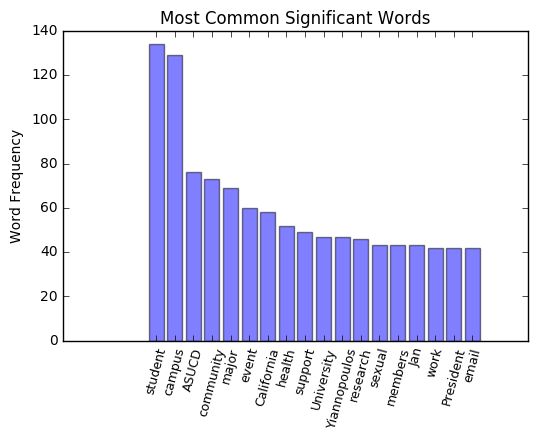

In [51]:
com_word_df = pd.DataFrame(com_words)
com_word_df.columns = ['term', 'freq']
com_head = com_word_df.head(30)

labels = list(com_head.ix[:,0])

indexes = np.arange(len(com_head))
freqs = list(com_head.ix[:,1])

plt.bar(indexes, freqs, align = 'center', alpha = 0.5)
plt.xticks(indexes, labels, rotation=75, fontsize = 9)
plt.ylabel('Word Frequency')
plt.title('Most Common Significant Words')
    
plt.show()

<font size=4.5><font color="darkblue">
The most common words for campus articles cover campus and recent political events (as evidenced by words like "Yiannopoulous" and "president". Now we do the same thing, but for the city news articles. 
</font></font>

In [77]:
words_ns = [re.findall(r'\w+', city_df['text'][x]) for x in range(len(city_df))]
words1 = [item for sublist in words_ns for item in sublist]
resultwords  = [word for word in words1 if word.lower() not in stopwords]
com_words = Counter(resultwords).most_common()[2:20]
com_words

[('city', 84),
 ('Sacramento', 65),
 ('Yolo', 57),
 ('food', 54),
 ('County', 51),
 ('event', 48),
 ('public', 45),
 ('City', 45),
 ('local', 44),
 ('state', 43),
 ('support', 42),
 ('residents', 41),
 ('time', 40),
 ('help', 39),
 ('music', 38),
 ('UC', 38),
 ('California', 37),
 ('services', 34)]

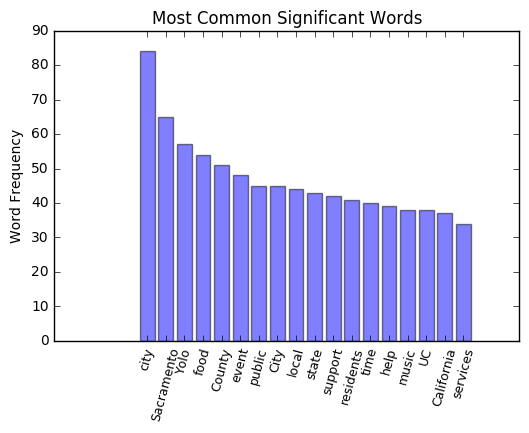

In [55]:
com_word_df = pd.DataFrame(com_words)
com_word_df.columns = ['term', 'freq']
com_head = com_word_df.head(30)

labels = list(com_head.ix[:,0])

indexes = np.arange(len(com_head))
freqs = list(com_head.ix[:,1])

plt.bar(indexes, freqs, align = 'center', alpha = 0.5)
plt.xticks(indexes, labels, rotation=75, fontsize = 9)
plt.ylabel('Word Frequency')
plt.title('Most Common Significant Words')
    
plt.show()

<font size=4.5><font color="darkblue">
The most common words for city news articles covers fewer political topics, but more practical words like "food", "music", etc. Next we repeat the process a third time, but for all the articles overall.  
</font></font>

In [56]:
#OVERALL MOST COMMON WORDS
words_ns = [re.findall(r'\w+', article_df['text'][x]) for x in range(len(article_df))]
words1 = [item for sublist in words_ns for item in sublist]
resultwords  = [word for word in words1 if word.lower() not in stopwords]
com_words = Counter(resultwords).most_common()[0:100]

#I SUBSET OUT THE FIRST TWO ENTRIES (UC, DAVIS) SINCE THEY CAN'T BE REMOVED OTHERWISE
com_words = com_words[2:50]

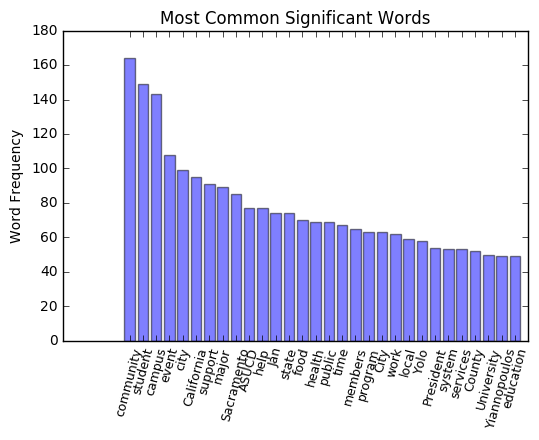

In [57]:
com_word_df = pd.DataFrame(com_words)
com_word_df.columns = ['term', 'freq']
com_head = com_word_df.head(30)

labels = list(com_head.ix[:,0])

indexes = np.arange(len(com_head))
freqs = list(com_head.ix[:,1])

plt.bar(indexes, freqs, align = 'center', alpha = 0.5)
plt.xticks(indexes, labels, rotation=75, fontsize = 9)
plt.ylabel('Word Frequency')
plt.title('Most Common Significant Words')
    
plt.show()

<font size=4.5><font color="darkblue">
Most common topics are obvious about the university, but more specifically there's a lot of talk about public health, politics, local events, and surprisingly little about academics.
</font></font>

<font size=4.5><font color="darkblue">
Now we're going to find the most similar pairs of articles.
</font></font>

In [59]:
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tokenize = nltk.word_tokenize

#PROF. SHARPNACKS FUNCTIONS
def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 
def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

#CREATE CORPUS
corpus_raw = ". ".join(article_df.text)

#INITIALIZE STEMMER
st = nltk.stem.LancasterStemmer()
corpus = set([st.stem(words) for words in nltk.tokenize.word_tokenize(corpus_raw)])

#VECTORIZE THIS CORPUS
vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words=stopwords,vocabulary=corpus)
vect.fit(corpus)

#FUNCTION TO TOKENIZE
def getStems(doc):
    stems = set([st.stem(words) for words in nltk.tokenize.word_tokenize(doc)])
    return(stems)

In [60]:
#GENERATES AND CALCULATES COSINE SIMILARITY SCORES
def getSparseMatrices(doc1, doc2):
    #print(len(doc1)+len(doc2))
    stems = [getStems(d) for d in [doc1, doc2]]
    doc1_vec = np.sum(vect.transform(stems[0]).toarray(), axis=0)
    doc2_vec = np.sum(vect.transform(stems[1]).toarray(), axis=0)
    cos_sim = np.dot(doc1_vec.T, doc2_vec) / (np.linalg.norm(doc1_vec)*np.linalg.norm(doc2_vec))
    return(cos_sim)

<font size=4.5><font color="darkblue">
Create the similarity matrix, and set the diagonals to 0, since we don't care about the similarity between each article and itself.
</font></font>

In [62]:
# GETS THE SIMILARITY MATRIX WE WANT TO WORK WITH
sim_mat = [[getSparseMatrices(row, col) for row in article_df.text] for col in article_df.text]

In [63]:
# CREATES MATRIX AND SETS DIAGONALS TO 0
similarity = np.array(sim_mat).reshape(120, 120)
np.fill_diagonal(similarity, 0)

<font size=4.5><font color="darkblue">
Now, we will triangularize to remove duplicate pairs, then catch any duplicates that have been posted more than once on listing or cross-posted using the for loop below.
</font></font>

In [64]:
# TRIANGULARIZE TO REMOVE DUPLICATES
sim_triangle = np.triu(similarity)
# print sim_triangle

# ERROR CATCHING
for i in range(len(sim_triangle)):
    for j in range(len(sim_triangle[i])):
        try:
            if round(sim_triangle[i][j],2) == 1:
                sim_triangle[i][j] = 0
        except:
            if sim_triangle[i][j] == 1:
                sim_triangle[i][j] = 0

<font size=4.5><font color="darkblue">
Now we get the indices to locate the highest similarity scores from the original article_df dataframe.
</font></font>

In [65]:
# GET INDEX AND SCORE FOR CLOSEST MATCHING ARTICLE FOR EACH ARTICLE IN article_df
closest_article = np.argsort(sim_triangle)[:,119]
top_score = np.sort(sim_triangle)[:,119]
# print top_score

<font size=4.5><font color="darkblue">
Create a dataframe of the results with the information calculated above, and sort by similarity score.
</font></font>

In [79]:
# CREATE DATAFRAME WITH SIMILAR STUFF
sim_df  = pd.DataFrame([pd.Series(range(120)), closest_article, article_df.title, article_df.author, article_df.title.values[closest_article],article_df.author.values[closest_article], pd.Series(top_score)]).T
sim_df.columns = ["article_index", "closest_index", "title", "author", "sim_article", "sim_author","sim_score"]

In [80]:
# SORT VALUES
sim_df = sim_df.sort_values(by="sim_score", ascending=False).iloc[::2,:]
sim_df.head()

,article_index,closest_index,title,author,sim_article,sim_author,sim_score
74,74,95,UC Davis holds first mental health conference,Jayashri Padmanabhan,UC Davis to host first ever mental health conf...,Jayashri Padmanabhan,0.410479
75,75,85,Last week in Senate,Demi Caceres,Last week in Senate,Yvonne Leong,0.380196
111,111,119,Protests erupt at Milo Yiannopoulos event,Lindsay Floyd,BREAKING NEWS: Milo Yiannopoulos event cancelled,Alyssa Vandenberg,0.350934
85,85,90,Last week in Senate,Yvonne Leong,Last week in Senate,Jeanna Totah,0.34545
104,104,108,US Department of Transportation awards $14 mil...,Demi Caceres,"Interim Chancellor Hexter, UC leaders sign let...",Jayashri Padmanabhan,0.337772


<font size=4.5><font color="darkblue">
The common articles look to be very similar, based on the titles. Covering either the same event, or topics in the same category.
</font></font>

In [81]:
#TOP PAIR
common_1 = " / ".join(set.intersection(set(article_df["text"][1].split(" ")), set(article_df["text"][35].split(" "))))
print "Top Pair"
print "Number words in Common: " + str(len(common_1)) + "\nWords in Common: \n" + common_1 + "\n\n"

#SECOND TOP PAIR
common_2 = " / ".join(set.intersection(set(article_df["text"][15].split(" ")), set(article_df["text"][25].split(" "))))
print "Second Top Pair"
print "Number words in Common: " + str(len(common_2)) + "\nWords in Common: \n" + common_2 + "\n\n"

#THIRD TOP PAIR
common_3 = " / ".join(set.intersection(set(article_df["text"][88].split(" ")), set(article_df["text"][114].split(" "))))
print "Third Top Pair"
print "Number words in Common: " + str(len(common_3)) + "\nWords in Common: \n" + common_3 + "\n\n"

Top Pair
Number words in Common: 381
Words in Common: 
 / and / all / because / just / is / them / one / as / are / have / in / need / our / said. / if / said / end / for / their / things / 45 / two / to / outside / teaching / It / was / be / tests / mostly / that / students / Many / who / but / it / they / not / during / teach / an / with / by / those / a / on / school / I / of / also / up / so / place / the / toward / or / UC / at


Second Top Pair
Number words in Common: 279
Words in Common: 
and / all / is / some / locations / located / as / at / in / go / any / said. / really / even / said / from / for / their / that / to / other / you / be / them / business / get / very / it / every / Davis / The / with / the / a / on / working / we / of / can / residents / Davis,


Third Top Pair
Number words in Common: 303
Words in Common: 
 / and / just / people / is / it / an / not / as / interim / at / have / in / its / said. / said / from / for / their / had / The / to / other / California 

<font size=4.5><font color="darkblue">
This Corpus is likely not representative of the Aggie as a whole, as we've taken articles from a fairly narrow time frame and, most importantly we haven't randomly sampled. As it stands none of the common words or article pairs appears surprising, but there's no way to be sure or make any real inference from this data without having some kind of control. Either by looking at other student papers or, ideally, other professional papers.  
</font></font>